# **Time Series Regression Analysis (Corporation Favorita)**


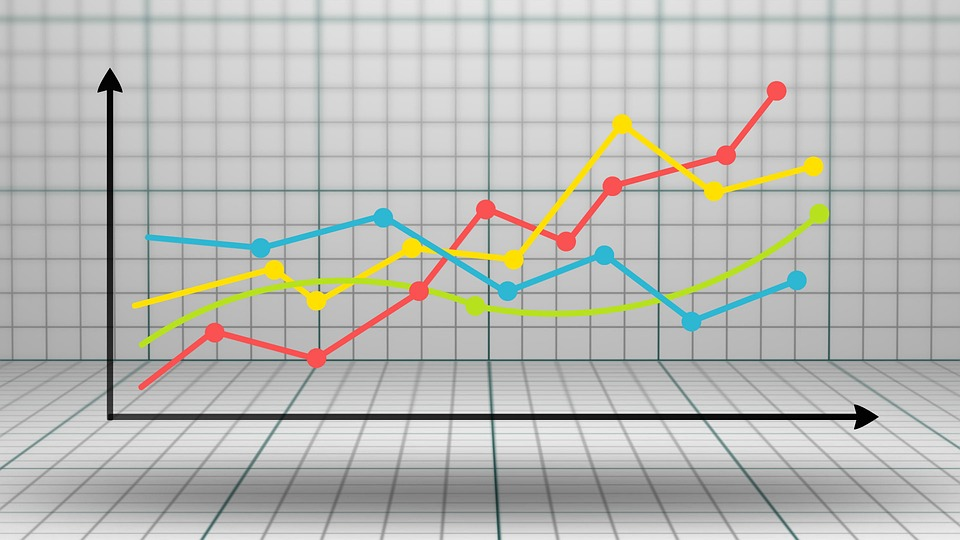

# **1. Business Understanding**

Predicting sales is crucial for business planning. In this project, we'll use machine learning to build a model that forecasts store sales. We'll use data from Corporation Favorita, a leading grocery retailer in Ecuador.

## **Project Objective**

Our main goal is to create a Machine Learning Model that predicts unit sales for various items sold in Favorita stores.

We'll analyze sales trends over time to understand customer behavior, identify seasonal patterns, and recognize other factors affecting sales. Factors like oil prices, holidays, and promotions can impact sales at Favorita. By analyzing this data, we aim to provide valuable insights to grocery retailers about customer preferences and behavior.

By examining data on customer purchases, demographics, and social media activity, retailers can better understand what drives their customers. This information can help tailor marketing strategies to boost sales. Additionally, it can help identify slow-selling products, optimize inventory, reduce costs, and increase profits—especially for perishable items like dairy and meat.

We'll also look into improving checkout processes to enhance the shopping experience.

In summary, accurate sales forecasting helps businesses plan better, manage inventory efficiently, and make informed decisions. This precision enables companies like Favorita to reduce costs and increase profitability.

## **Approach and Methodology**

This project will adhere to the CRISP-DM (Cross-Industry Standard Process for Data Mining) Framework, a widely recognized methodology for data science projects. We will explore various machine learning techniques to achieve accurate sales predictions, including but not limited to:


### **1. Time Series Forecasting**

We'll employ advanced time series forecasting methods to capture temporal patterns and seasonality in sales data. Techniques we may use include:

- **ARIMA (Autoregressive Integrated Moving Average):** Suitable for capturing linear relationships in time series data.
  
- **LSTM (Long Short-Term Memory):** A type of recurrent neural network well-suited for capturing long-term dependencies in time series.

- **Prophet:** Developed by Facebook, Prophet is designed to handle daily data with strong seasonal patterns and holidays.

### **2. Regression Models**

Regression models will be used to account for various features that influence sales, such as promotional status, product details, and store information. We may employ:

- **Linear Regression:** A straightforward approach to modeling the relationship between dependent and independent variables.

- **Decision Trees:** Useful for capturing non-linear relationships and interactions between features.

- **Random Forests:** An ensemble method that combines multiple decision trees for improved accuracy and robustness.

- **Gradient Boosting:** An iterative technique that builds strong predictive models by optimizing a differentiable loss function.

By exploring these techniques, we aim to build a comprehensive model that can provide actionable insights into customer behavior, optimize inventory management, and ultimately enhance profitability for Favorita and similar grocery retailers.

In [3]:
import dotenv
from dotenv import dotenv_values
import pyodbc
import pandas as pd
import warnings
import zipfile
import os
warnings.filterwarnings("ignore")


In [4]:
# Load .env values
environment_variables = dotenv_values(".env")

# Get .env values
server =  environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

# Create a connection string
connection_string=f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [11]:
# Connect to the database
connection = pyodbc.connect(connection_string)

In [12]:
# Get data from table dbo.oil in the database
query_dbo_oil = "SELECT * FROM dbo.oil"
oil_data = pd.read_sql(query_dbo_oil, connection)
oil_data.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.139999
2,2013-01-03,92.970001
3,2013-01-04,93.120003
4,2013-01-07,93.199997


In [13]:
# Load data from dbo.holidays_events table in the database
query_dbo_holidays_events = "SELECT * FROM dbo.holidays_events"
holidays_events_data = pd.read_sql(query_dbo_holidays_events, connection)
holidays_events_data.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [14]:
# Load data from dbo.stores table in the database
query_dbo_stores = "SELECT * FROM dbo.stores"
stores_data = pd.read_sql(query_dbo_stores, connection)
stores_data.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [26]:
# Define the path to the zip file
zip_file_path = "Zip Files/store-sales-forecasting.zip"

# Define the extraction directory
extract_dir = "Data"

# List of files to extract
files_to_extract = ["train.csv", "transactions.csv"]

# Extract files
with zipfile.ZipFile(zip_file_path, 'r') as zObject:
    for file_name in files_to_extract:
        zObject.extract(file_name, os.path.join(extract_dir, file_name))

print("Extraction completed.")

Extraction completed.


In [28]:
# Load train and transaction data 
# The data was downloaded from a GitHub repo (https://github.com/Azubi-Africa/Career_Accelerator_LP3-Regression/blob/main/store-sales-forecasting.zip)
train_data=pd.read_csv(r"Data\train.csv\train.csv", parse_dates =['date'])
transaction_data=pd.read_csv(r"Data\transactions.csv\transactions.csv", parse_dates =['date'])
train_data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [29]:
transaction_data.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
